#### Business Objective:
**Predict the Reliance Industries Stock Price for the next 30 days.
There are Open, High, Low and Close prices that you need to obtain from the web
for each day starting from 2015 to 2022 for Reliance Industries stock.**
* **Split the last year into a test set- to build a model to predict stock price.**
* **Find short term, &amp; long term trends.**
* **Understand how it is impacted from external factors or any big external events.**
* **Forecast for next 30 days.**

## Scraping the data

In [1]:
!pip install nsepy

In [26]:
#get_history provides historical data
from nsepy import get_history
#To get information of date,month and year
from datetime import date
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
start_date = date(2015,1,1)
end_date = date(2022,12,31)

#Symbol is visible in NSE website. It's like a short name given to every company
reliance = get_history(symbol ='RELIANCE',start = start_date, end = end_date)
print(reliance)

              Symbol Series  Prev Close     Open     High      Low     Last  \
Date                                                                          
2015-01-01  RELIANCE     EQ      891.15   886.30   892.00   883.65   888.00   
2015-01-02  RELIANCE     EQ      887.90   888.10   896.05   884.30   884.95   
2015-01-05  RELIANCE     EQ      885.55   885.00   890.90   874.10   875.55   
2015-01-06  RELIANCE     EQ      875.85   870.00   873.00   832.00   832.50   
2015-01-07  RELIANCE     EQ      836.10   837.10   858.80   837.00   858.00   
...              ...    ...         ...      ...      ...      ...      ...   
2022-12-26  RELIANCE     EQ     2502.20  2514.75  2542.00  2492.40  2525.00   
2022-12-27  RELIANCE     EQ     2524.05  2530.00  2548.80  2515.25  2542.70   
2022-12-28  RELIANCE     EQ     2544.70  2538.00  2549.80  2521.50  2542.00   
2022-12-29  RELIANCE     EQ     2544.45  2527.00  2548.90  2525.50  2544.95   
2022-12-30  RELIANCE     EQ     2543.30  2545.10  25

In [4]:
#Converting the data to dataframe
reliance_data = pd.DataFrame(reliance)
reliance_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,RELIANCE,EQ,891.15,886.30,892.00,883.65,888.00,887.90,887.62,677439,6.013059e+13,16263,286377,0.4227
2015-01-02,RELIANCE,EQ,887.90,888.10,896.05,884.30,884.95,885.55,889.39,1675827,1.490461e+14,31269,1048543,0.6257
2015-01-05,RELIANCE,EQ,885.55,885.00,890.90,874.10,875.55,875.85,881.88,2309591,2.036781e+14,67035,1393132,0.6032
2015-01-06,RELIANCE,EQ,875.85,870.00,873.00,832.00,832.50,836.10,847.60,4258043,3.609133e+14,120767,2353273,0.5527
2015-01-07,RELIANCE,EQ,836.10,837.10,858.80,837.00,858.00,854.30,849.81,4736315,4.024972e+14,125939,2885468,0.6092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,RELIANCE,EQ,2502.20,2514.75,2542.00,2492.40,2525.00,2524.05,2523.81,2764496,6.977059e+14,117927,1225057,0.4431
2022-12-27,RELIANCE,EQ,2524.05,2530.00,2548.80,2515.25,2542.70,2544.70,2534.62,2659749,6.741453e+14,138609,1246382,0.4686
2022-12-28,RELIANCE,EQ,2544.70,2538.00,2549.80,2521.50,2542.00,2544.45,2537.68,3442509,8.735979e+14,158888,1908597,0.5544


In [5]:
#reliance.to_csv('reliance_stock.csv')

## Data preprocessing and EDA

In [6]:
#Filtering only Open,High,Low and Close
reliance = reliance_data[['Open','High','Low','Close']]
reliance.head()

,Open,High,Low,Close
Date,,,,
2015-01-01,886.3,892.00,883.65,887.90
2015-01-02,888.1,896.05,884.30,885.55
2015-01-05,885.0,890.90,874.10,875.85
2015-01-06,870.0,873.00,832.00,836.10
2015-01-07,837.1,858.80,837.00,854.30


In [7]:
#Converting date into column
reliance = reliance.reset_index()

In [8]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1982 non-null   object 
 1   Open    1982 non-null   float64
 2   High    1982 non-null   float64
 3   Low     1982 non-null   float64
 4   Close   1982 non-null   float64
dtypes: float64(4), object(1)
memory usage: 77.5+ KB


**Here Date is object data type. It has to be of datetime format for getting insights from it**

In [9]:
#Converting Dtype of date to datetime
pd.to_datetime(reliance['Date'])

0      2015-01-01
1      2015-01-02
2      2015-01-05
3      2015-01-06
4      2015-01-07
          ...    
1977   2022-12-26
1978   2022-12-27
1979   2022-12-28
1980   2022-12-29
1981   2022-12-30
Name: Date, Length: 1982, dtype: datetime64[ns]

In [10]:
reliance['Date']=pd.to_datetime(reliance['Date'])

In [11]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1982 non-null   datetime64[ns]
 1   Open    1982 non-null   float64       
 2   High    1982 non-null   float64       
 3   Low     1982 non-null   float64       
 4   Close   1982 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 77.5 KB


* **We can see that there are 1982 rows and all the null values**
* **Here Date is converted to datetime format**

In [12]:
#Now setting the date column to index as before
reliance = reliance.set_index(reliance['Date'])
reliance

,Date,Open,High,Low,Close
Date,,,,,
2015-01-01,2015-01-01,886.30,892.00,883.65,887.90
2015-01-02,2015-01-02,888.10,896.05,884.30,885.55
2015-01-05,2015-01-05,885.00,890.90,874.10,875.85
2015-01-06,2015-01-06,870.00,873.00,832.00,836.10
2015-01-07,2015-01-07,837.10,858.80,837.00,854.30
...,...,...,...,...,...
2022-12-26,2022-12-26,2514.75,2542.00,2492.40,2524.05
2022-12-27,2022-12-27,2530.00,2548.80,2515.25,2544.70
2022-12-28,2022-12-28,2538.00,2549.80,2521.50,2544.45


In [13]:
#Dropping the extra date column
reliance = reliance.drop(['Date'],axis = 1)
reliance.head()

,Open,High,Low,Close
Date,,,,
2015-01-01,886.3,892.00,883.65,887.90
2015-01-02,888.1,896.05,884.30,885.55
2015-01-05,885.0,890.90,874.10,875.85
2015-01-06,870.0,873.00,832.00,836.10
2015-01-07,837.1,858.80,837.00,854.30


**So now we have four columns.** 
* **Open price is nothing but the price at which a security first trades when an exchange happens for the day.**
* **Close price is the last price at which a stock trades during a regular trading session**
* **High is the highest price at which a stock traded during the course of trading session**
* **Low is the lowest price that a stock trades in that day**

In [14]:
reliance.duplicated().sum()

0

**No duplicate values**

In [32]:
reliance.describe()

,Open,High,Low,Close
count,1982.000000,1982.000000,1982.000000,1982.000000
mean,1497.437967,1514.365439,1479.932265,1496.429516
std,594.501915,600.886661,587.715465,594.035889
min,791.750000,793.400000,779.100000,780.900000
25%,993.600000,1005.137500,984.162500,993.737500
50%,1278.000000,1289.650000,1261.200000,1277.425000
75%,2038.550000,2064.875000,2002.675000,2031.775000
max,2856.150000,2856.150000,2786.100000,2819.850000


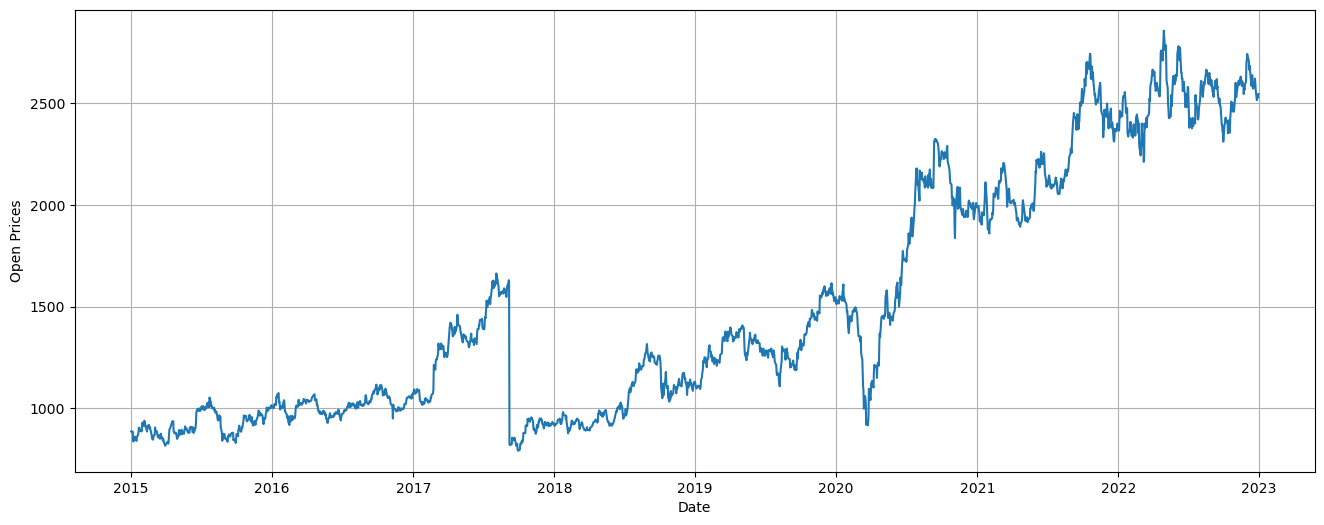

In [27]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Open Prices')
plt.plot(reliance['Open'])
plt.show()

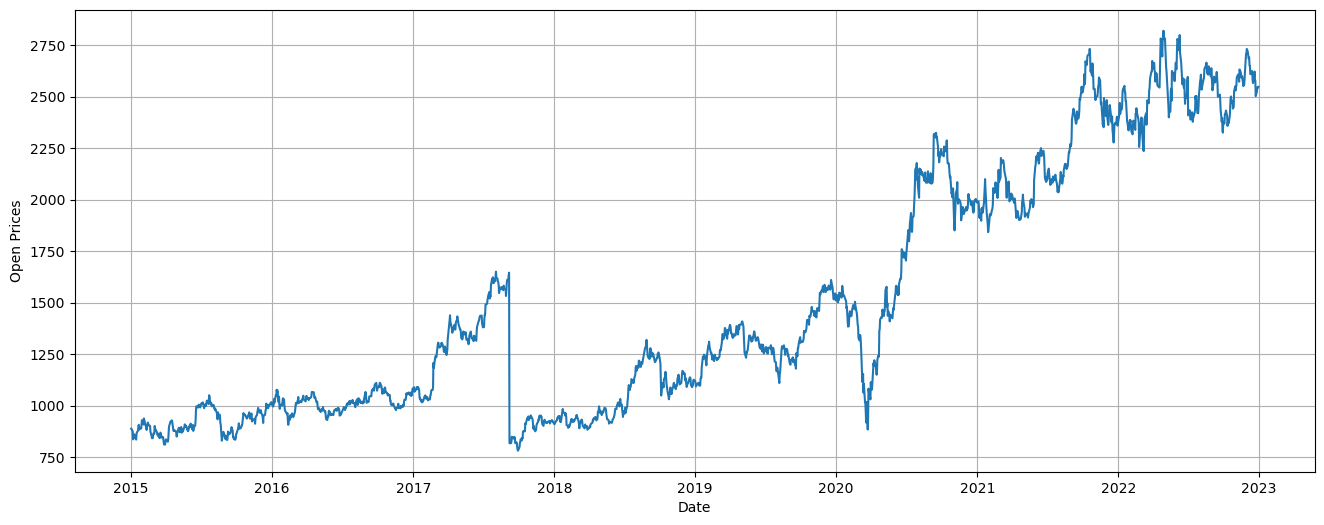

In [29]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Open Prices')
plt.plot(reliance['Close'])
plt.show()

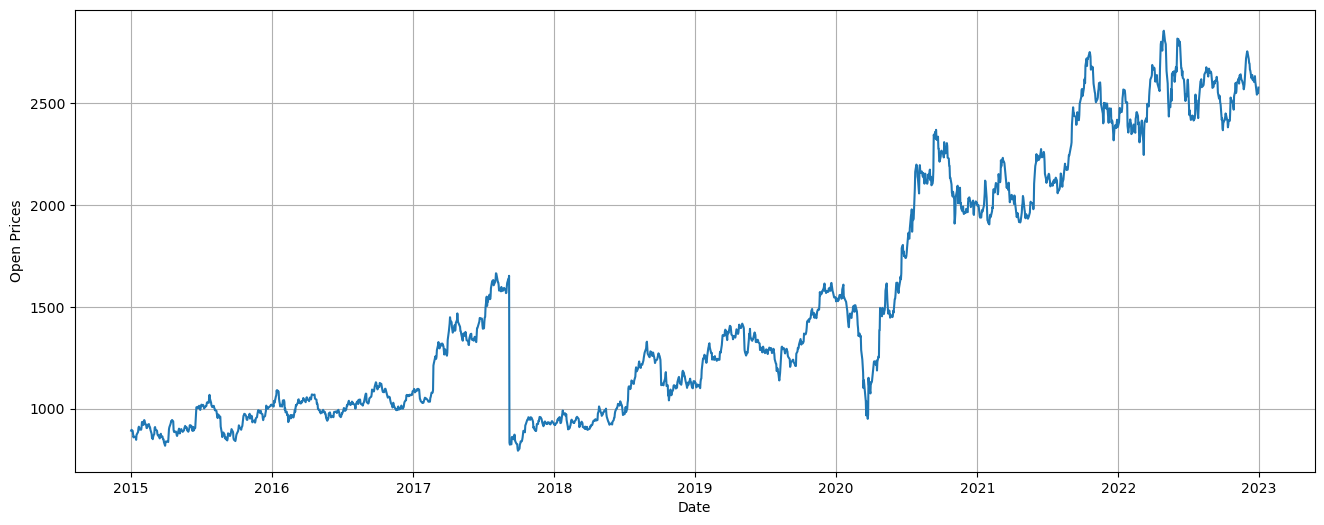

In [30]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Open Prices')
plt.plot(reliance['High'])
plt.show()

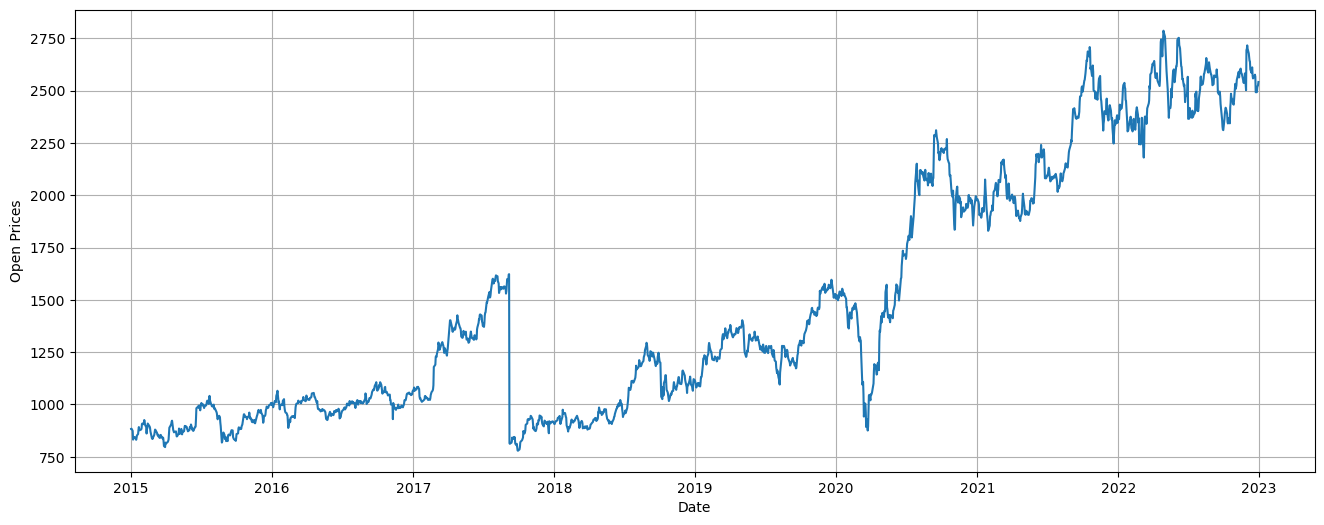

In [31]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Open Prices')
plt.plot(reliance['Low'])
plt.show()

In [20]:
reliance.head()

,Open,High,Low,Close
Date,,,,
2015-01-01,886.3,892.00,883.65,887.90
2015-01-02,888.1,896.05,884.30,885.55
2015-01-05,885.0,890.90,874.10,875.85
2015-01-06,870.0,873.00,832.00,836.10
2015-01-07,837.1,858.80,837.00,854.30


In [21]:
#rule A gives year and frequency
reliance.resample(rule = 'A').max()

,Open,High,Low,Close
Date,,,,
2015-12-31,1053.50,1067.85,1041.20,1050.40
2016-12-31,1117.00,1129.55,1106.60,1110.80
2017-12-31,1663.00,1664.90,1622.80,1650.10
2018-12-31,1316.30,1329.00,1295.00,1319.00
2019-12-31,1615.00,1617.55,1596.10,1609.95
2020-12-31,2325.00,2369.35,2310.55,2324.55
2021-12-31,2742.75,2751.35,2708.00,2731.85
2022-12-31,2856.15,2856.15,2786.10,2819.85


<AxesSubplot:xlabel='Date'>

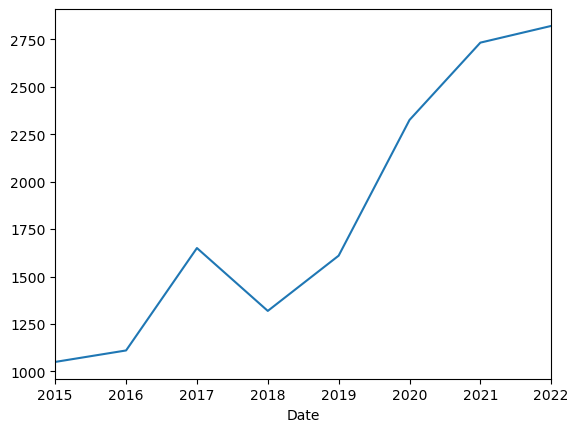

In [22]:
reliance.resample(rule = 'A').max()['Close'].plot()

In [23]:
#For quarterly function, rule = 'QS'
#For each month, rule = 'M'